# Chapter 9 Exercises

3. Why is it generally preferable to use a logistic regression classifier rather than a classic perceptron (i.e., a single layer of threshold logic units trained using the perceptron training algorithm)? How can you tweak a perceptron to make it equivalent to a logistic regression classifier?


4. Why was the sigmoid activation function a key ingredient in training the first MLPs?

By replacing something like the step-function with the sigmoid (logistic function) gradient descent is able to make progress with each iteration since the sigmoid function has a nonzero derivitive everywhere (no flat spots).


5. Name three popular activation functions. Can you draw them?

- The hyperbolic tangent function: `tanh(z) = 2σ(2z) – 1`
- Sigmoid (logistic) function: `σ(z) = 1 / (1 + exp(–z))`
- The rectified linear unit function: `ReLU(z) = max(0, z)`

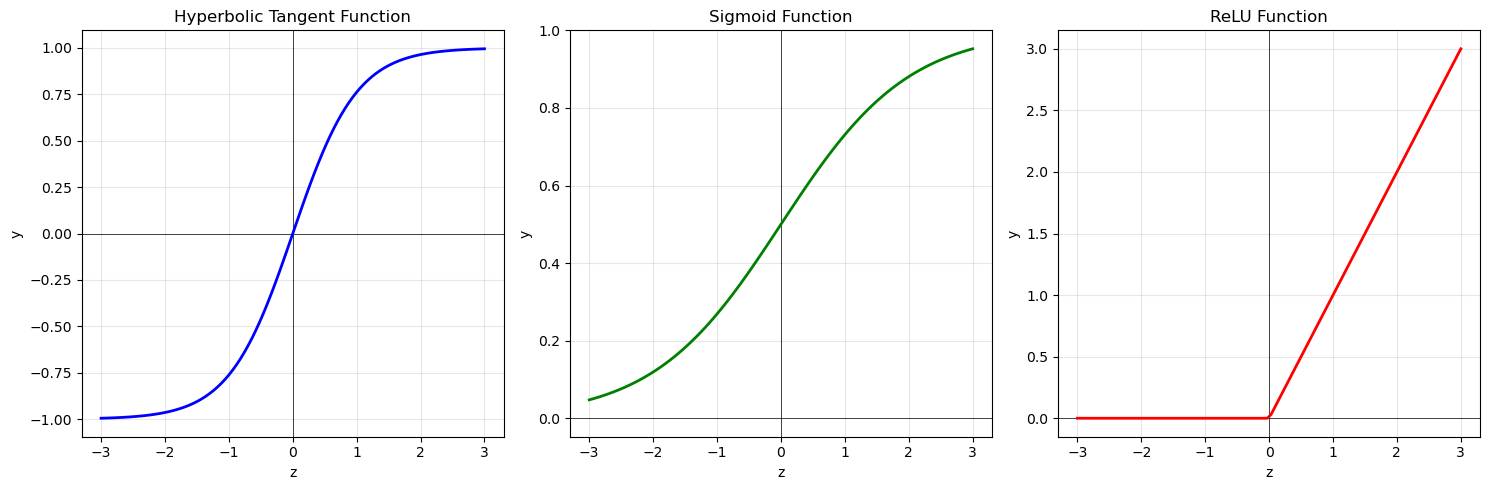

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def hyperbolic_tangent_function(z):
    return np.tanh(z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

z_values = np.linspace(-3,3,100)

y1,y2,y3 = hyperbolic_tangent_function(z_values), sigmoid(z_values), relu(z_values)

fig, ax = plt.subplots(1, 3, figsize=(15,5))

for a in ax:
    a.axhline(y=0, color='k', linewidth=0.5)
    a.axvline(x=0, color='k', linewidth=0.5)
    a.grid(True, alpha=0.3)
    a.set_xlabel('z')
    a.set_ylabel('y')


ax[0].plot(z_values, y1, 'b-', linewidth=2)
ax[0].set_title("Hyperbolic Tangent Function")

ax[1].plot(z_values, y2, 'g-', linewidth=2)
ax[1].set_title("Sigmoid Function")

ax[2].plot(z_values, y3, 'r-', linewidth=2)
ax[2].set_title("ReLU Function")

plt.tight_layout()
plt.show()




6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

    a. What is the shape of the input matrix X?
        shape(X) = [,10]
    b. What are the shapes of the hidden layer’s weight matrix Wh and bias vector bh?
        shape(Wh) = [,50] bh
    c. What are the shapes of the output layer’s weight matrix Wo and bias vector bo?

    d. What is the shape of the network’s output matrix Y?

    e. Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo, and bo.


7. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use? What about for getting your network to predict housing prices, as in Chapter 2?

> Two neurons, one for spam and one for ham?

> 


8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?

> Backpropagation is a combination of techniques designed to reduce error in the neural network. The first part is the reverse-mode automatic differentiation (reverse-mode autodiff) which is able to compute the gradients of the model's error with regard to it's paramaters very quickly in a forwards and backwards pass. With these gradients in hand, a gradient descent can be performed repeatedly until the error drops towards a minimum. Combined this technique when applied to neural nets is known as backpropagation and it allows us to train models by understanding how the parameters effect the error.



9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?


10. Train a deep MLP on the CoverType dataset. You can load it using `sklearn.datasets.fetch_covtype()`. See if you can get over 93% accuracy on the test set by fine-tuning the hyperparameters manually and/or using `RandomizedSearchCV`.

In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

covertype = fetch_covtype(as_frame=True)
x_train, x_test, y_train, y_test = train_test_split(
    covertype.data, covertype.target, random_state=42
    )

In [2]:
x_train.dtypes

Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area_0                     float64
Wilderness_Area_1                     float64
Wilderness_Area_2                     float64
Wilderness_Area_3                     float64
Soil_Type_0                           float64
Soil_Type_1                           float64
Soil_Type_2                           float64
Soil_Type_3                           float64
Soil_Type_4                           float64
Soil_Type_5                           float64
Soil_Type_6                           float64
Soil_Type_7                       

In [3]:
y_train.dtypes

dtype('int32')

In [4]:
y_train.value_counts()

Cover_Type
2    212525
1    158834
3     26845
7     15445
6     12994
5      7020
4      2096
Name: count, dtype: int64

Check if any columns have missing data where we would need the `SimpleImputer`

In [ ]:
x_train.isnull().sum()

First attempt using the MinMaxScaler and a [50,50,50] hidden layer shape.

We use the scaler to squish feature values into a range of 0 to 1. `scaled_value = (value - min) / (max - min)` since the ranges of our features are quite varied (Elevation is much larger numbers than slope for example) we are helping the model not give elevation more importantce than is due simply because the number is larger. 

In [5]:
deep_mlp = MLPClassifier(hidden_layer_sizes=[50,50,50], early_stopping=True,
                       verbose=True, random_state=42)

In [6]:
pipeline = make_pipeline(MinMaxScaler(), deep_mlp)
pipeline.fit(x_train, y_train)
accuracy = pipeline.score(x_test, y_test)

Iteration 1, loss = 0.68989894
Validation score: 0.744446
Iteration 2, loss = 0.57965742
Validation score: 0.758261
Iteration 3, loss = 0.54685157
Validation score: 0.763631
Iteration 4, loss = 0.52175443
Validation score: 0.780269
Iteration 5, loss = 0.50272213
Validation score: 0.780843
Iteration 6, loss = 0.48942362
Validation score: 0.776184
Iteration 7, loss = 0.47798875
Validation score: 0.797457
Iteration 8, loss = 0.46866396
Validation score: 0.799431
Iteration 9, loss = 0.45927300
Validation score: 0.795002
Iteration 10, loss = 0.45102287
Validation score: 0.797021
Iteration 11, loss = 0.44236180
Validation score: 0.812787
Iteration 12, loss = 0.43483169
Validation score: 0.811387
Iteration 13, loss = 0.42832540
Validation score: 0.814990
Iteration 14, loss = 0.42277608
Validation score: 0.824904
Iteration 15, loss = 0.41616022
Validation score: 0.819373
Iteration 16, loss = 0.41099660
Validation score: 0.830021
Iteration 17, loss = 0.40626154
Validation score: 0.830274
Iterat

In [8]:
print(accuracy)

0.8728287883899127


Now let's try with a different architecture, in the fashion MNST we used a larger first layer followed by a smaller second layer, let's try that here and see what we get.

In [9]:
deep_mlp = MLPClassifier(hidden_layer_sizes=[300,100], early_stopping=True,
                       verbose=True, random_state=42)
pipeline = make_pipeline(MinMaxScaler(), deep_mlp)
pipeline.fit(x_train, y_train)
accuracy = pipeline.score(x_test, y_test)

Iteration 1, loss = 0.63747068
Validation score: 0.755554
Iteration 2, loss = 0.54105040
Validation score: 0.775197
Iteration 3, loss = 0.50411933
Validation score: 0.788186
Iteration 4, loss = 0.47742158
Validation score: 0.801175
Iteration 5, loss = 0.45515303
Validation score: 0.807623
Iteration 6, loss = 0.43690761
Validation score: 0.814026
Iteration 7, loss = 0.42099188
Validation score: 0.823664
Iteration 8, loss = 0.40723818
Validation score: 0.827497
Iteration 9, loss = 0.39655766
Validation score: 0.836148
Iteration 10, loss = 0.38582343
Validation score: 0.833073
Iteration 11, loss = 0.37581527
Validation score: 0.834978
Iteration 12, loss = 0.36758265
Validation score: 0.840050
Iteration 13, loss = 0.36135320
Validation score: 0.828943
Iteration 14, loss = 0.35374555
Validation score: 0.851134
Iteration 15, loss = 0.34797714
Validation score: 0.855494
Iteration 16, loss = 0.34230266
Validation score: 0.860221
Iteration 17, loss = 0.33748848
Validation score: 0.863182
Iterat

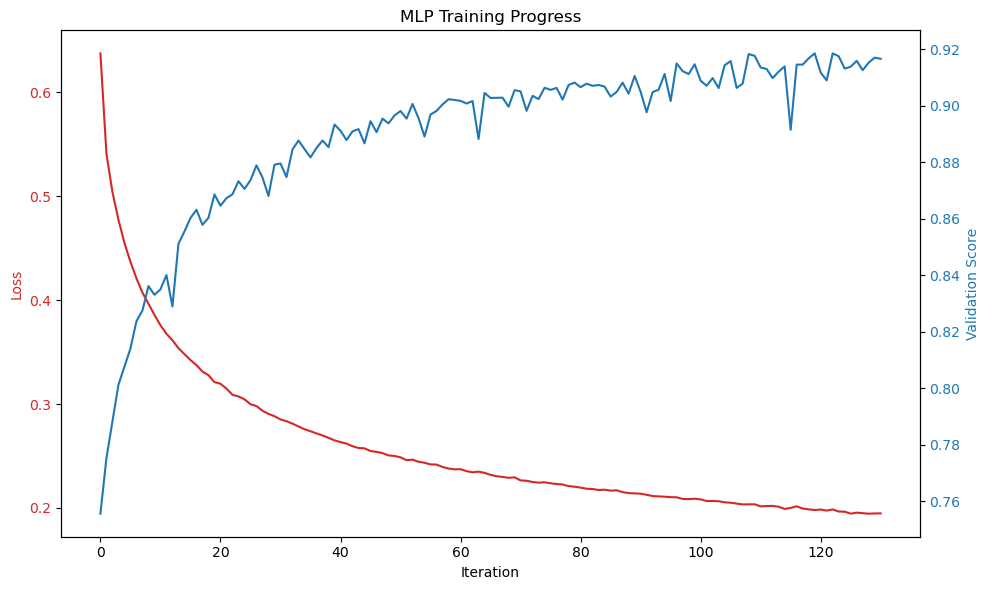

In [18]:
import matplotlib.pyplot as plt

mlp = pipeline.named_steps['mlpclassifier']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(mlp.loss_curve_, color='tab:red', label='Training Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Validation Score', color='tab:blue')
ax2.plot(mlp.validation_scores_, color='tab:blue', label='Validation Score')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('MLP Training Progress')
fig.tight_layout()
plt.show()

In [17]:
print(accuracy)

0.9176402552787206


So our much wider MLP with two hidden layers [300,100] got a %91.7 accuracy score. Not bad! I wonder if the improvement was largely due to having such a dramatic increase in the neurons from our first try of [50,50,50] hidden layer shape. 

The obvious next step is to use the RandomizedCV to try lots of options but I'm curious now if we did a [100,100,100] so that we can see how the same number of layers as the first one which scored 87.2% compares with double the neurons, but less than this most recent [300,100] test.